## <center> Модель машинного обучения для предсказания рейтинга отеля, поставленный постояльцем
 Цель: создать модель, основанную на алгоритмах машинного обучения, предсказывающую оценку для отеля от постояльцев на основе исходного датасета

 Будем работать с датасетом, в котором содержаться сведения об отзывах на отели в европе. Датасет сотоит из 17 колонок и 386803 строк.

 В ходе работы будем практиковать навыки EDA: удаление неинформативных данных, очистка от пропущенных значений, поиск дубликатов, создание новых признаков, преобразование признаков, отбор признаков.
На основе подготовленного датасета будет произведено обучение модели и сделана оценка эффективности модели.


In [240]:
#  Импортируем необходимые библиотеки 
import numpy as np 
import pandas as pd 

# кодирование
import category_encoders as ce

# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Введем игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

In [241]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [242]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
#%pip freeze > requirements.txt

In [243]:
# Подгрузим наши данные из соревнования

# DATA_DIR = '/kaggle/input/sf-booking/'
# df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
# df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
# sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

df_train = pd.read_csv('dt/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv('dt/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv('dt/submission.csv') # самбмишн



## Описание признаков

hotel_address — адрес отеля;

review_date — дата, когда рецензент разместил соответствующий отзыв;

average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;

hotel_name — название отеля;

reviewer_nationality — страна рецензента;

negative_review — отрицательный отзыв, который рецензент дал отелю;

review_total_negative_word_counts — общее количество слов в отрицательном отзыв;

positive_review — положительный отзыв, который рецензент дал отелю;

review_total_positive_word_counts — общее количество слов в положительном отзыве;

reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;

total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;

total_number_of_reviews — общее количество действительных отзывов об отеле;

tags — теги, которые рецензент дал отелю;

days_since_review — количество дней между датой проверки и датой очистки;

additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

lat — географическая широта отеля;

lng — географическая долгота отелялгота отеля.

In [244]:
# Исходный файл для обучения 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [245]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


В тестовой последовательности нет целевого признака, поэтому количество признаков 16

In [246]:
# Посмотрим на тестовый файл
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [247]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


Файл sample_sabmission содержит оценку от постояльца, которая есть в исходном датасете, и его id

In [248]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [249]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


## Поиск дубликатов перед объединением файлов

In [250]:
# маска на поиск дубликатов 
mask = df_train.duplicated()
df_train_dup = df_train[mask]
print(f'Число дубликатов: {df_train_dup.shape[0]}')

# удаление дубликатов
df_train = df_train.drop_duplicates()
print(f'Результирующее число записей: {df_train.shape[0]}')

# проверка 
mask = df_train.duplicated()
df_train_dup = df_train[mask]
print(f'Число дубликатов: {df_train_dup.shape[0]}')

Число дубликатов: 307
Результирующее число записей: 386496
Число дубликатов: 0


In [251]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.head(2)

data = pd.concat([df_test, df_train], sort=False, ignore_index=True,  axis=0 )# объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [252]:
# Посмотрим, что получилось после объединения файлов. Мы видим, что колонок стало 17 и количество строк изменилось - 515431
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

# Поиск пропусков 
Как видно из описания датафрейма у нас есть пропуски в признаках lat и lng. Узнаем какой процент пропусков, чтоб принять решение, что делать с этими признаками.


In [253]:
data.isnull().mean().sort_values(ascending=False)

lng                                           0.00634
lat                                           0.00634
hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
sample                                        0.00000
days_since_review                             0.00000
tags                                          0.00000
total_number_of_reviews_reviewer_has_given    0.00000
review_total_positive_word_counts             0.00000
positive_review                               0.00000
total_number_of_reviews                       0.00000
review_total_negative_word_counts             0.00000
negative_review                               0.00000
reviewer_nationality                          0.00000
hotel_name                                    0.00000
average_score                                 0.00000
review_date                                   0.00000
reviewer_score                                0.00000
dtype: float64

Заполняем пропуски в признаках с пропущенными значениями lat и lng, т.к. процент пропусков небольшой. Удалять признак нет необходимости. Для заполнениям будем использовать бибилиотеку geopy

In [254]:
#%pip install geopy

In [255]:
from geopy.geocoders import Nominatim


In [256]:
geolocator = Nominatim(user_agent='SkillF_name')
name = data[data['lat'].isnull() | data['lng'].isnull()]['hotel_name'].value_counts().index.to_list()
address = data[data['lat'].isnull() | data['lng'].isnull()]['hotel_address'].value_counts().index.to_list()

На момент создания файла, была выдана ошибка сервера `GeocoderUnavailable: HTTPSConnectionPool` в закомментированом коде ниже.
Но до выдачи ошибки, код работал и выдал необходимый словарь. Запишу этот словарь в отдельной ячейке.

In [257]:
# coord_dict = {}
# for nm, ad in zip(name, address):
#     new_ad = ad[0].split()[-4:]
#     ' ' .join(new_ad)
#     location = geolocator.geocode(new_ad)
#     if nm not in coord_dict:
#         coord_dict[nm] = [location.latitude, location.longitude]

In [258]:
# Полученный словрь из geocode
coord_dict = {'Fleming s Selection Hotel Wien City': [-30.7054363, -69.1988222],
 'Hotel City Central': [50.9014721, 11.0377839],
 'Hotel Atlanta': [52.5461934, 21.2073404],
 'Maison Albar Hotel Paris Op ra Diamond': [67.07865995959239, 26.56656703387902],
 'Hotel Daniel Vienna': [50.9358672, 22.8307732],
 'Hotel Pension Baron am Schottentor': [52.5461934, 21.2073404],
 'Austria Trend Hotel Schloss Wilhelminenberg Wien': [47.7981346, 13.0464806],
 'Derag Livinghotel Kaiser Franz Joseph Vienna': [47.7981346, 13.0464806],
 'NH Collection Barcelona Podium': [53.2668455, 22.8525787],
 'City Hotel Deutschmeister': [54.24556, 18.1099],
 'Hotel Park Villa': [50.6080651, 9.0284647],
 'Cordial Theaterhotel Wien': [-30.7054363, -69.1988222],
 'Holiday Inn Paris Montmartre': [35.7298752, 139.71129548269388],
 'Roomz Vienna': [52.1458506, 17.397672],
 'Mercure Paris Gare Montparnasse': [35.7298752, 139.71129548269388],
 'Renaissance Barcelona Hotel': [52.1458506, 17.397672],
 'Hotel Advance': [47.7981346, 13.0464806]}

In [259]:
# Функция 
def fill_coords(row):
    if pd.isna(row.lat):
        coord = coord_dict[row.hotel_name]
        if coord is not None:
            row.lat = coord[0]
            row.lng = coord[1]
            return row
    else:
        return row

data = data.apply(lambda row: fill_coords(row), axis=1)

In [260]:
# Проверка заполнения пропусками 
data.isnull().mean().sort_values(ascending=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

Этап очистки и заполнения данными закончен.

# Работа с признаками 
Проведем работу с признаками: будем искать новые признаки и вытаскивать информацию из уже имеющихся признаков 

# Признак hotel_address
Из этого признака мы можем вытащить страну отеля, а в дальнешейм этот признак закодировать для модели.

In [261]:
# Создание нового признака "Страна отеля"
data['country hotel']= data['hotel_address'].apply(lambda x: x.split(' ')[-1]) 
data['country hotel'].value_counts()

# мы получили страны отелей, их всего 6.
# К сожаланию, одно название неполное United Kingdom = Kingdom

country hotel
Kingdom        262300
Spain           60149
France          59626
Netherlands     57212
Austria         38938
Italy           37206
Name: count, dtype: int64

Признаков всего 6 и они категориальные. Можно закодировать через OneHot. Закодируем сразу и удалим признак hotel_address

In [262]:
encoder = ce.OneHotEncoder(cols = 'country hotel', use_cat_names=True)
country_bin = encoder.fit_transform(data['country hotel'])
data = pd.concat([data, country_bin], axis=1)
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lng,sample,reviewer_score,country hotel,country hotel_Italy,country hotel_Netherlands,country hotel_Spain,country hotel_Kingdom,country hotel_France,country hotel_Austria
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,9.171102,0,0.0,Italy,1,0,0,0,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,4.834443,0,0.0,Netherlands,0,1,0,0,0,0


In [263]:
# удалим признак hotel_address
data = data.drop(['hotel_address','country hotel'], axis = 1)
data.shape

(515431, 23)

### Признак review_date
Перевдем признак в формат datetime, чтоб потом его преобразовать в год и месяц.

In [264]:
# Перевод даты в формат datatime
data['review_date'] = pd.to_datetime(data['review_date'], dayfirst=False)
data['review_date'].sort_values()

199263   2015-08-04
128050   2015-08-04
109739   2015-08-04
425833   2015-08-04
290741   2015-08-04
            ...    
202423   2017-08-03
445819   2017-08-03
118007   2017-08-03
378692   2017-08-03
230096   2017-08-03
Name: review_date, Length: 515431, dtype: datetime64[ns]

In [265]:
# Создание признаков год и месяц
data['year'] = data['review_date'].dt.year
data['month'] = data['review_date'].dt.month
print(data['year'].value_counts())
print(data['month'].value_counts())

year
2016    264259
2017    156743
2015     94429
Name: count, dtype: int64
month
8     50632
7     49291
5     46470
10    43803
6     42877
4     42872
9     42369
1     42133
3     41090
12    39591
2     38352
11    35951
Name: count, dtype: int64


Мы получили из даты новые признаки - год и месяц. Возможно, что это будут важные признаки. Признак review_date нам больше не нужен. Мы можем его удалить.

In [266]:
data = data.drop('review_date', axis = 1)
data.shape

(515431, 24)

In [267]:
data.head(3)

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,sample,reviewer_score,country hotel_Italy,country hotel_Netherlands,country hotel_Spain,country hotel_Kingdom,country hotel_France,country hotel_Austria,year,month
0,904,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,...,0,0.0,1,0,0,0,0,0,2017,7
1,612,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,...,0,0.0,0,1,0,0,0,0,2016,12
2,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,...,0,0.0,0,0,1,0,0,0,2015,11


### Признак average_score
Из этого признака мы создадим два признака - уровень отеля: топ с оценками >= 9 и хороший с оценками от 8,0 до 9,0. Этот признак пока удалять не будем, посомтрим, что он покажет на значимости.

In [268]:
data['top'] = data['average_score'].apply(lambda x: 1 if x >= 9.0 else 0)
print(data['top'].value_counts())
data['good'] = data['average_score'].apply(lambda x: 1 if 8.0 >= x <= 8.9 else 0)
print(data['good'].value_counts())

top
0    435968
1     79463
Name: count, dtype: int64
good
0    398664
1    116767
Name: count, dtype: int64


### Признак days_since_review

Можем этот признак преобразовать в целоче число 

In [269]:
# Преобразование типов признака с object на int.
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.split()[0])
data['days_since_review'] = data['days_since_review'].astype(int)
data['days_since_review']

0          13
1         234
2         616
3         656
4         444
         ... 
515426    106
515427    171
515428    543
515429     74
515430    363
Name: days_since_review, Length: 515431, dtype: int32

### Признак negative_review и positive_review
Тут можно воспользоваться библиотекой NLTK, чтобы оценить настроение отзыва, а можно сделать чуть проще: получить две колонки - только негативный и только позитивный на основе налиичия позитивного или негативного опыта.



In [270]:
# Создание нового признака на основе позитивного отзыва "Только негативный отзыв"
data['only negative'] = data['positive_review'].apply(lambda x: 1 if x == 'No Positive' else 0)
print(data['only negative'].value_counts())

# Создание нового признака на основе негативного отзыва "Только позитивный отзыв"
data['only positive'] = data['negative_review'].apply(lambda x: 1 if x == 'No Negative' else 0)
print(data['only positive'].value_counts())

only negative
0    479507
1     35924
Name: count, dtype: int64
only positive
0    387615
1    127816
Name: count, dtype: int64


In [271]:
#%pip install nltk

Все же воспользуемся библиотекой nltk

In [272]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Legion 5
[nltk_data]     Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [273]:
# Создадим новые признаки
data[['positive_vader', 'negative_vader']] = data[['positive_review', 'negative_review']]

Проанализировав признаки, можно заметить, что есть слова, которые могут давать противоположную окраску отзыву. Такие слова лучше заменить на однозначные.

In [274]:
# Функция для замены позитивных слов в негативных отзывах
def negative_turnover(elem):
    neg_list = ['no negative', 'nothing']
    for word in neg_list:
        elem = elem.lower().replace(f'{word}', 'positive')
    return elem

In [275]:
# Функция для подмены негативных слов в позитивных отзывах
def positive_turnover(elem):
    pos_list = ['nothing', 'no positive']
    for word in pos_list:
        elem = elem.lower().replace(f'{word}', 'negative')
    return elem

In [276]:
# Применений функций к признакам
data['negative_vader'] = data['negative_vader'].apply(negative_turnover)
    
data['positive_vader'] = data['positive_vader'].apply(positive_turnover)    

In [277]:
# Соединим позитивный и негативный отзыв в единый для получения резлуьтата compound
data['vader'] = data['positive_vader'] + data['negative_vader'] 

In [278]:
# Функция для получения коэффициента общего значения 
def vader_analics(review):
    analyzer = SentimentIntensityAnalyzer()
    result = analyzer.polarity_scores(review)
    return result['compound']

In [279]:
# Создание нового признака 
#data['vader_score'] = data['vader'].apply(vader_analics)

In [280]:
# Функция для получения коэффициента позитивного окраса 
# по словам позитивного отзыва
def vader_analitics_positive(review):
    analyzer = SentimentIntensityAnalyzer()
    result = analyzer.polarity_scores(review)
    return result['pos']

In [281]:
# Создание нового признака 
#data['vader_pos'] = data['positive_vader'].apply(vader_analitics_positive)

In [282]:
# Функция для получения коэффициента негативного окраса 
# по словам негативного отзыва
def vader_analitics_negative(review):
    analyzer = SentimentIntensityAnalyzer()
    result = analyzer.polarity_scores(review)
    return result['neg']


In [283]:
# Создание нового признака 
#data['vader_neg'] = data['negative_vader'].apply(vader_analitics_negative)

Так как код долго выполняется, выделим полученные данные в отдельный лист.

In [284]:
# list_vader = ['vader_neg', 'vader_pos', 'vader_score']
# vader_score = data[list_vader]
# vader_score.to_csv('dt/vader_score_.csv', index=False)

In [285]:
data = data.drop(['positive_vader', 'negative_vader',  'vader'], axis = 1)

In [286]:
vader_score = pd.read_csv('dt/vader_score.csv')
data = pd.concat([data, vader_score], axis=1)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515431 non-null  int64  
 1   average_score                               515431 non-null  float64
 2   hotel_name                                  515431 non-null  object 
 3   reviewer_nationality                        515431 non-null  object 
 4   negative_review                             515431 non-null  object 
 5   review_total_negative_word_counts           515431 non-null  int64  
 6   total_number_of_reviews                     515431 non-null  int64  
 7   positive_review                             515431 non-null  object 
 8   review_total_positive_word_counts           515431 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 

### Признаки review_total_negative_word_counts и review_total_positive_word_counts
Скорее всего эти признаки оказывают влияние на прогноз оценки. Тут можно заметить сразу, что указанное количество слов не соответствует реальному количеству. Исправим это. Из полученных новых признаком, мы может получить соотношение эмоционального окраса. Чем больше будет полученное число, тем положительнее отзыв, чем меньше будет число, тем выше вероятность, что отзыв отрицательный.
После получения новых признаков, колонки с количеством слов можно будет удалить и как сами отзывы.

In [288]:
# Заменим часто встречаемое слово на пустую строку в негативном отзыве
data['negative_review_copy'] = data['negative_review'].apply(lambda x: '' if x.strip().lower() == 'no positive' else x)
data[data['negative_review_copy'] == 'No positive'].shape[0]

# Заменим часто встречаемое слово на пустую строку в позитивном отзыве
data['positive_review_copy'] = data['positive_review'].apply(lambda x: '0' if x.strip().lower() == 'no negative' else x)
data[data['positive_review_copy'] == 'No negative'].shape[0]

0

In [289]:
# Создадим функцию для подсчета слов в строке
def count_world(row):
    list_world = []
    row = row.strip().split(' ')

    for elem in row:
        list_world.append(elem)
    return len(list_world)    
data['new_count_world_negative'] = data['negative_review_copy'].apply(count_world)
data['new_count_world_positive'] = data['positive_review_copy'].apply(count_world) 
data['new_count_world_positive'].nlargest(10)

512807    393
435929    384
284648    382
425340    382
36992     381
140139    381
66679     380
402098    378
285516    376
154926    375
Name: new_count_world_positive, dtype: int64

In [290]:
# Создадим новый признак с соотношением позитивных и негативных эмоций
data['emotional_coloring'] = round(data['new_count_world_positive']/data['new_count_world_negative'], 2)
data['emotional_coloring'].value_counts()

emotional_coloring
1.00      22954
2.00      14779
0.50      14695
3.00      11889
1.50       9888
          ...  
6.28          1
10.26         1
15.41         1
237.00        1
37.75         1
Name: count, Length: 1713, dtype: int64

In [291]:
# Удалим ненужные признаки 
data = data.drop(['review_total_positive_word_counts', 'review_total_negative_word_counts', 'negative_review_copy', 'positive_review_copy', 'negative_review', 'positive_review'], axis = 1)
data.shape

(515431, 30)

### Признак tags
В tags много разной информации. Найдем новые признаки на основе этого признака.

In [292]:
# Ищим новые признаки в tags 
data_tag = data.copy()

def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    result = num_tags.strip().split(' \', \' ')
    return result

data_tag['tags_n'] = data_tag['tags'].apply(rev_func)


data_tag = data_tag.explode('tags_n')
data_tag['tags_n'].value_counts().nlargest(15)

tags_n
Leisure trip                      417538
Submitted from a mobile device    307470
Couple                            252128
Stayed 1 night                    193568
Stayed 2 nights                   133850
Solo traveler                     108476
Stayed 3 nights                    95761
Business trip                      82884
Group                              65361
Family with young children         60989
Stayed 4 nights                    47777
Double Room                        35207
Standard Double Room               32247
Superior Double Room               31361
Family with older children         26334
Name: count, dtype: int64

На выходе мы получили самые часто используемые тэги. Из всего набора данных выделим новые признаки, которые заполним бинарными значениями.


In [293]:
# Создание нового признака поездка на отдых/бизнес поездка 
data['Type trip'] = data['tags'].str.contains('Leisure trip')
data['Type trip'] = data['Type trip'].astype(int)

In [294]:
# Создание нового признака Traveler - один/не один
data['Traveler'] = data['tags'].str.contains('Solo traveler')
data['Traveler'] = data['Traveler'].astype(int)

In [295]:
# Создание нового признака "одна ночь в отеле"
data['Night'] = data['tags'].str.contains('Stayed 1 night')
data['Night'] = data['Night'].astype(int)

In [296]:
# Удалим признак tags 
data = data.drop('tags', axis = 1)
data.shape

(515431, 32)

Посмотрим, что у нас получилось перед следующим этапом

Доочистим наш датасет от отсавшихся признаков, которые мы не использовали


In [297]:
data = data.drop(['hotel_name', 'reviewer_nationality'], axis= 1)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515431 non-null  int64  
 1   average_score                               515431 non-null  float64
 2   total_number_of_reviews                     515431 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 4   days_since_review                           515431 non-null  int32  
 5   lat                                         515431 non-null  float64
 6   lng                                         515431 non-null  float64
 7   sample                                      515431 non-null  int64  
 8   reviewer_score                              515431 non-null  float64
 9   country hotel_Italy                         515431 non-null  int64  
 

### Изучение подготовленного DF
Построим визуализации (гистограммы распредления, коробчатые диаграммы)

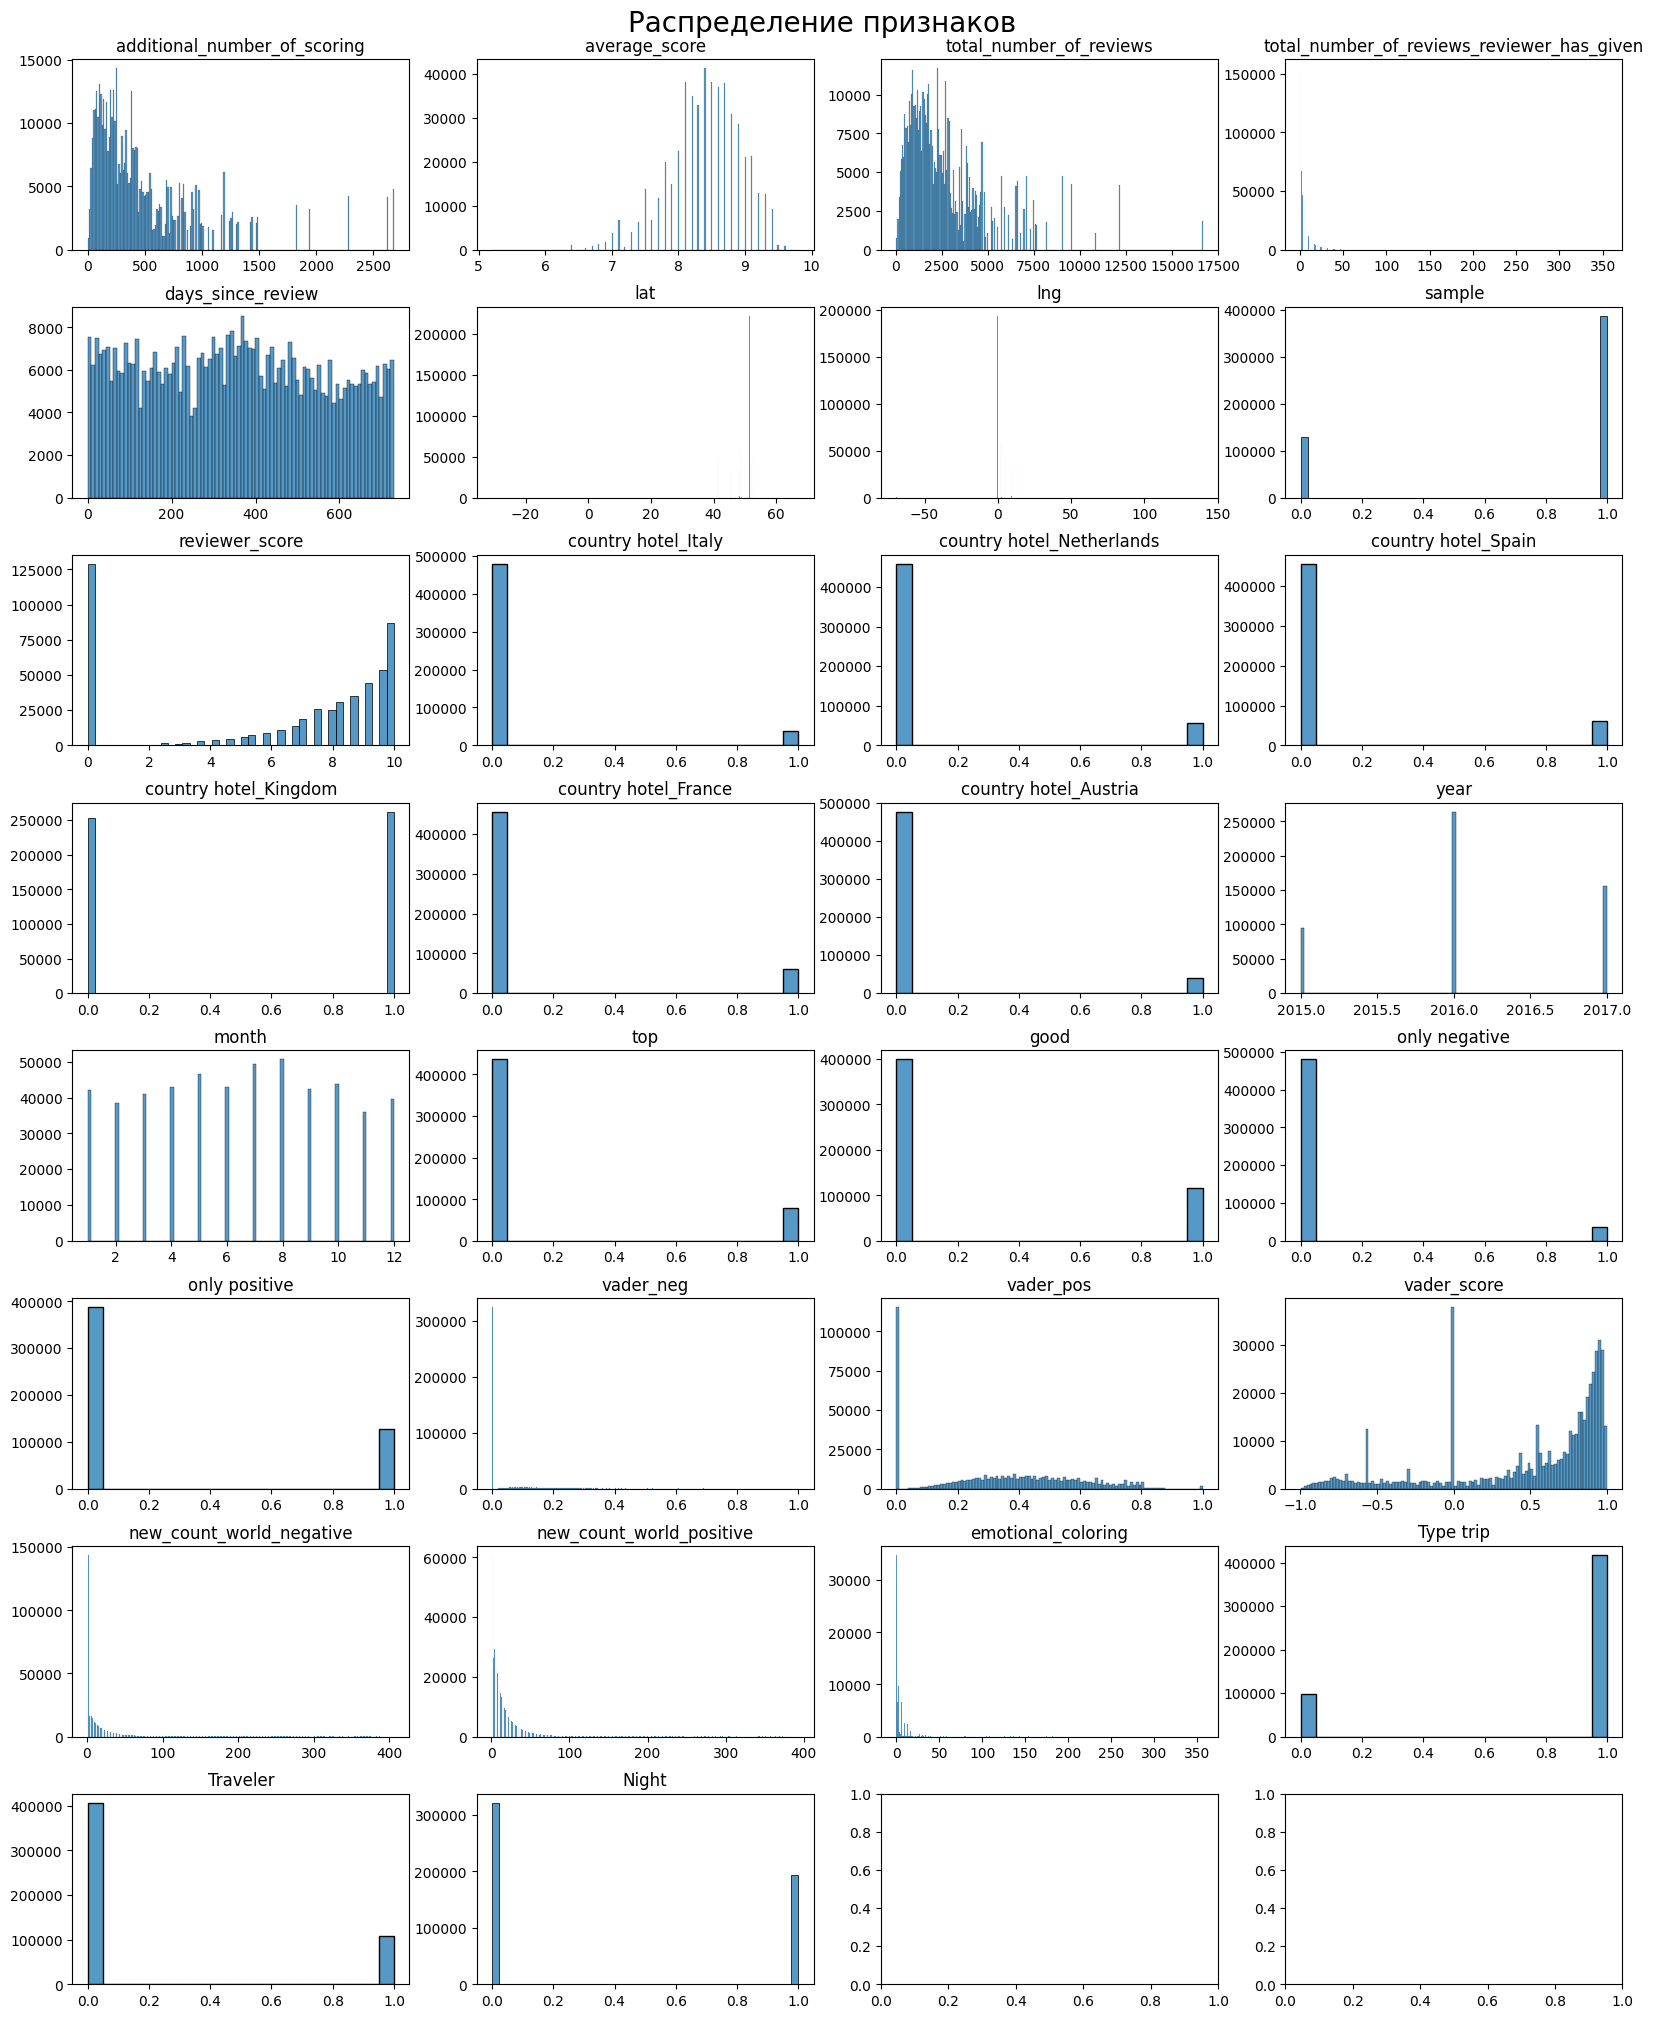

In [300]:
# Задаем subplot и прописываем настройки
fig, axes = plt.subplots(ncols=4, nrows=8, figsize = (20,25))
fig.subplots_adjust(hspace=0.3)

# Построение диаграмм произведем циклом, 
row = 0
col = 0

for elem in data.columns:
    
    hist = sns.histplot(data[f'{elem}'], ax=axes[row][col])
    
    hist.set_title(f'{elem}')
    hist.set_xlabel('')
    hist.set_ylabel('')
    
    col += 1
    
    if col == 4:
        col = 0
        row += 1
        
# Зададим заголовок группе графиков
fig.suptitle('Распределение признаков',
             fontsize = 20,
             y=0.9
             )

fig.show('png')

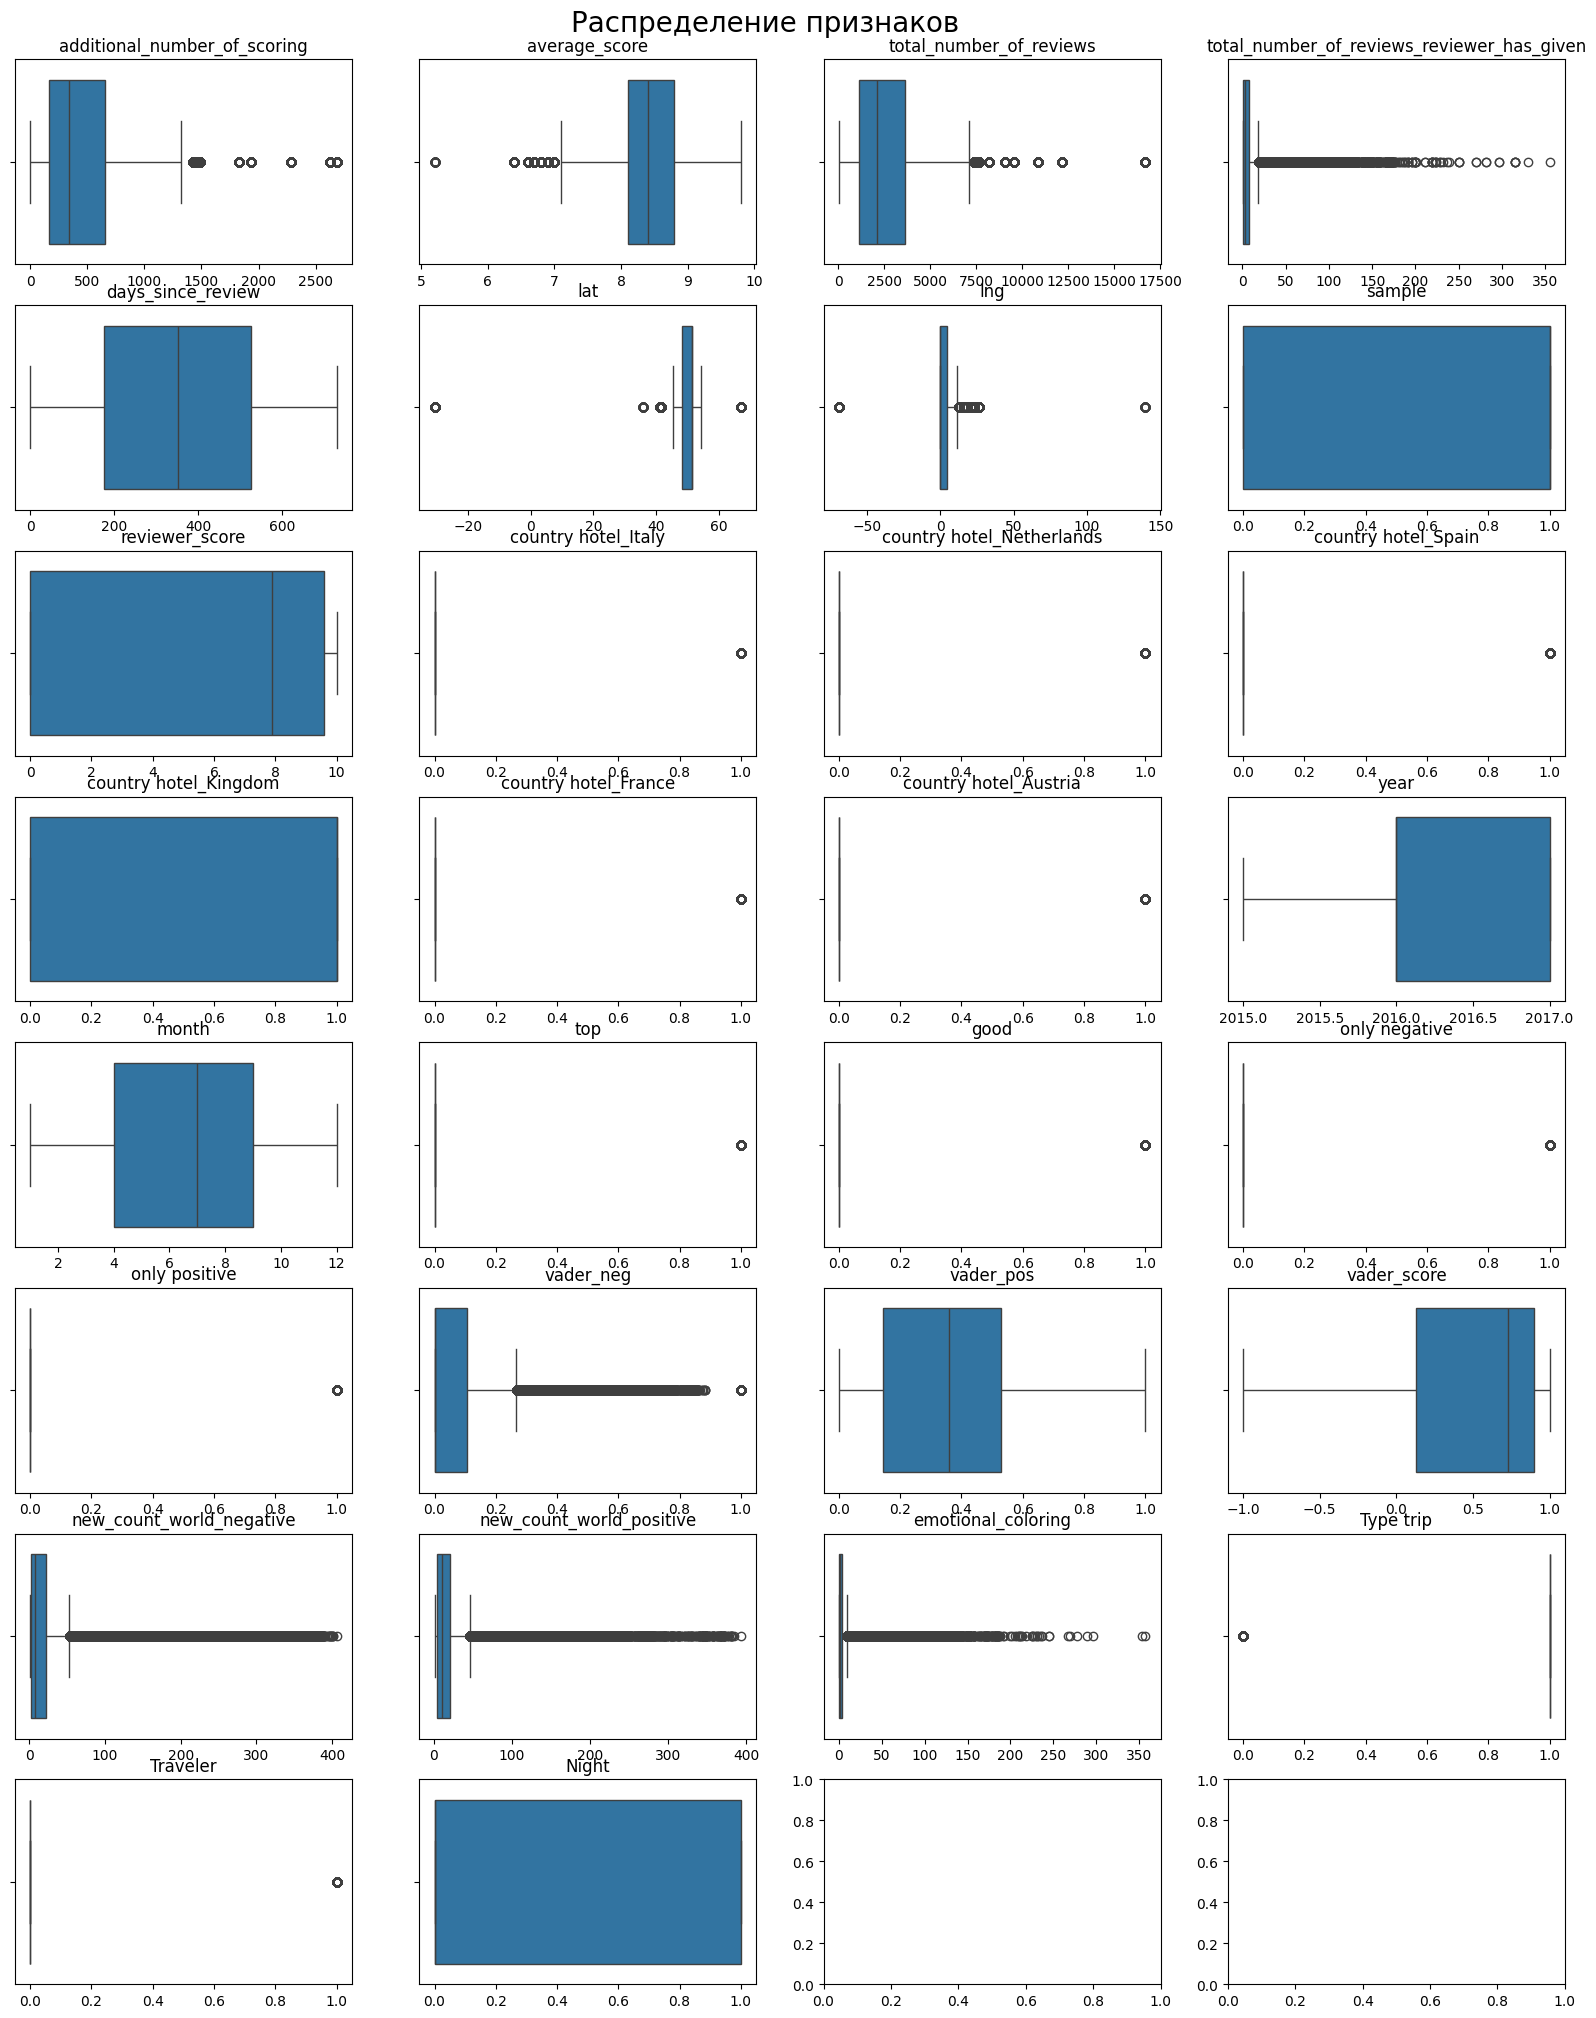

In [302]:
# Задаем subplot и прописываем настройки
fig, axes = plt.subplots(ncols=4, nrows=8, figsize = (20,25))

# Построение диаграмм произведем циклом, 
row = 0
col = 0

for elem in list(data.columns):

    box = sns.boxplot(
        data[f'{elem}'],
        ax=axes[row][col],
        orient='h',
        )
    box.set_xlabel('')
    box.set_ylabel('')
    box.set_title(f'{elem}')
    
    col += 1
    
    if col == 4:
        col = 0
        row += 1

# Зададим заголовок группе графиков
fig.suptitle('Распределение признаков', 
             fontsize = 20, va='top', y=0.9
             )

fig.show('png')

По диаграммам распределния мы видим, что признаки не распределены нормально, а также у нас большое количество выбросов.

### Корреляцая 

Построим тепловую матрицу корреляции, чтобы определить наличие мультиколлинеарных признаков

In [303]:
data.columns

Index(['additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given',
       'days_since_review', 'lat', 'lng', 'sample', 'reviewer_score',
       'country hotel_Italy', 'country hotel_Netherlands',
       'country hotel_Spain', 'country hotel_Kingdom', 'country hotel_France',
       'country hotel_Austria', 'year', 'month', 'top', 'good',
       'only negative', 'only positive', 'vader_neg', 'vader_pos',
       'vader_score', 'new_count_world_negative', 'new_count_world_positive',
       'emotional_coloring', 'Type trip', 'Traveler', 'Night'],
      dtype='object')

<Axes: >

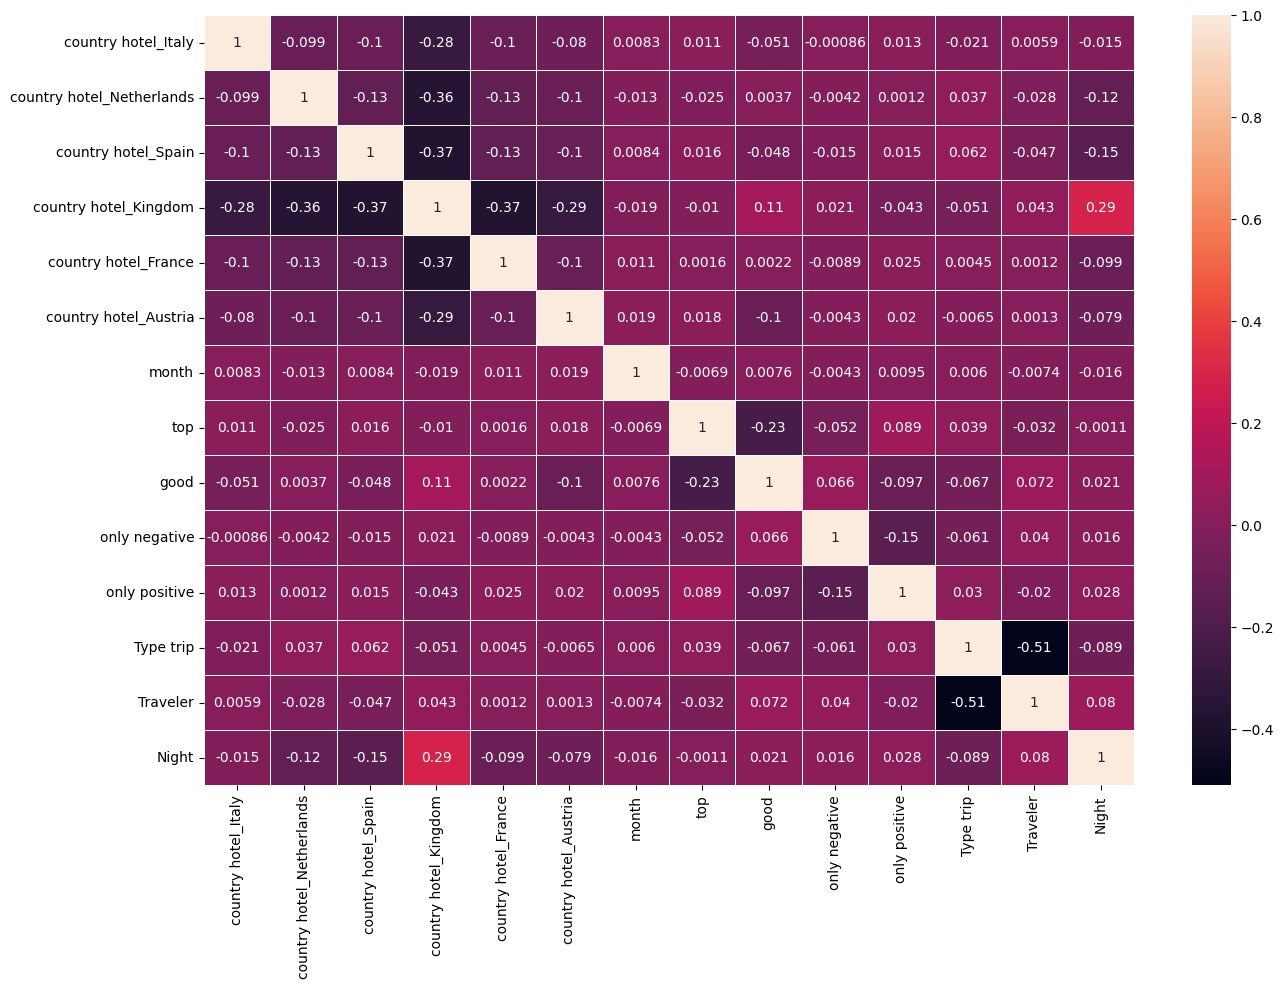

In [ ]:
# Тепловая матрица корреляции для категориальных признаков 
cat_coll = ['country hotel_Italy', 'country hotel_Netherlands',
       'country hotel_Spain', 'country hotel_Kingdom', 'country hotel_France',
       'country hotel_Austria', 'month', 'top', 'good',
       'only negative', 'only positive', 'Type trip',
       'Traveler', 'Night']

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data[cat_coll].corr(method='kendall'), annot=True, linewidths=.5, ax=ax)

<Axes: >

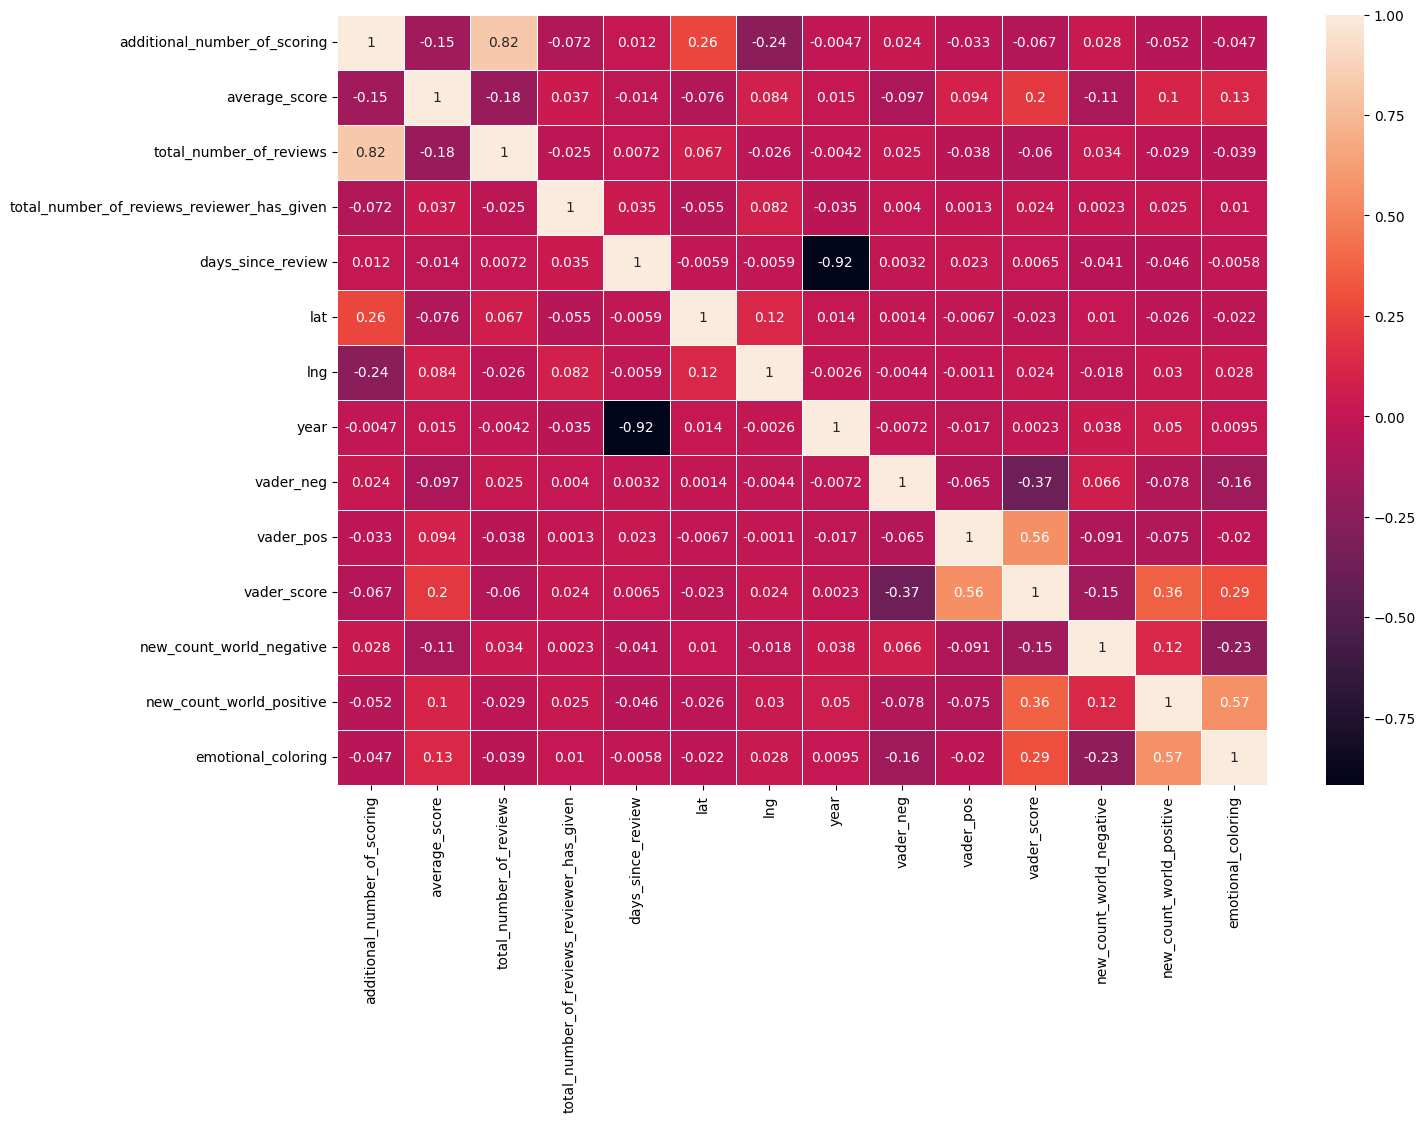

In [305]:
# Тепловая матрица корреляции для числовых признаков 
num_coll = ['additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given',
       'days_since_review', 'lat', 'lng', 'year', 'vader_neg', 'vader_pos',
       'vader_score', 'new_count_world_negative',
       'new_count_world_positive', 'emotional_coloring']
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data[num_coll].corr(), annot=True, linewidths=.5, ax=ax)

По тепловой матрице корреляций мы видим, что есть признаки у которые очень сильная связь *days_since_review - year*  и сильная связь *total_number_of_reviews - additional_number_of_scoring*

### Проведем отбор признаков по их значимости

Для отбора значимости будем использовать статитистические тесты: непараметрический тест хи-квадрат для катгориальных признаков и анализ (ANOVA) для числовых признаков. Для начала разделим наш датасет.

In [ ]:
# # Теперь выделим тестовую часть
# train_data = data.query('sample == 1').drop(['sample'], axis=1)
# test_data = data.query('sample == 0').drop(['sample'], axis=1)

# y = train_data.reviewer_score.values     # наш таргет
# X = train_data.drop(['reviewer_score'], axis=1)

In [306]:
y = data.reviewer_score.values 
X = data.drop(['reviewer_score'], axis=1)

In [307]:
from sklearn.feature_selection import f_classif # anova
from sklearn.feature_selection import chi2 # хи-квадрат

<Axes: >

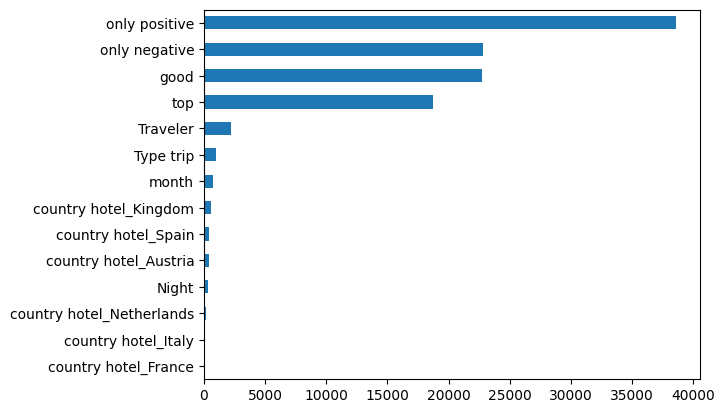

In [308]:
y=y.astype('int')

# Оценка влияния признака по методу хи-квадрат
imp_cat = pd.Series(chi2(X[cat_coll], y)[0], index=cat_coll)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')


In [309]:
# Посмотрим на цифры оценки по методу хи-квадрат
imp_cat_df = pd.DataFrame(imp_cat)
imp_cat_df = imp_cat_df.reset_index()
imp_cat_df = imp_cat_df.rename(columns={'index' : 'feature', 0 : 'impact'})
imp_cat_df = imp_cat_df.sort_values(by='impact', ascending=False)
imp_cat_df = imp_cat_df.reset_index().drop('index', axis=1)

# Отобразим получившийся DF с наименование признака и оценкой его влияния
display(imp_cat_df)

,feature,impact
0,only positive,38621.062733
1,only negative,22847.510958
2,good,22690.521577
3,top,18727.230869
4,Traveler,2241.677899
5,Type trip,1009.833845
6,month,732.664147
7,country hotel_Kingdom,541.564335
8,country hotel_Spain,431.562757
9,country hotel_Austria,384.719392


<Axes: >

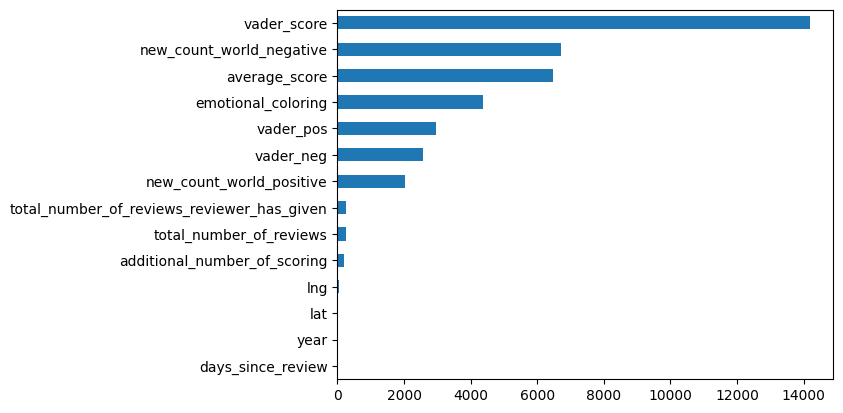

In [310]:
# Оценка влияния признака по методу ANOVA
imp_num = pd.Series(f_classif(X[num_coll], y)[0], index = num_coll)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [311]:
# Посмотрим на цифры оценки по методу ANOVA
imp_num_df = pd.DataFrame(imp_num)
imp_num_df = imp_num_df.reset_index()
imp_num_df = imp_num_df.rename(columns={'index' : 'feature', 0 : 'impact'})
imp_num_df = imp_num_df.sort_values(by='impact', ascending=False)
imp_num_df = imp_num_df.reset_index().drop('index', axis=1)

# Отобразим получившийся DF с наименование признака и оценкой его влияния
display(imp_num_df)

,feature,impact
0,vader_score,14188.971184
1,new_count_world_negative,6726.384043
2,average_score,6485.969037
3,emotional_coloring,4360.999303
4,vader_pos,2965.926123
5,vader_neg,2573.279621
6,new_count_world_positive,2035.950987
7,total_number_of_reviews_reviewer_has_given,266.916510
8,total_number_of_reviews,246.510528
9,additional_number_of_scoring,188.228564


Теперь создадим список тех признаков, которые пойдут на обучение модели. Отбор от 150.

In [316]:
sign_list = ['vader_score''additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given', 
       'country hotel_Spain', 'country hotel_Kingdom',
       'country hotel_Austria', 'month', 'top', 'good',
       'only negative', 'only positive', 'new_count_world_negative',
       'new_count_world_positive', 'emotional_coloring', 'Type trip',
       'Traveler', 'Night', 'vader_score', 'vader_pos', 'vader_neg']


In [317]:
# Список с таргетом reviewer_score
sign_list_score = ['additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given', 'sample', 'reviewer_score',
       'country hotel_Spain', 'country hotel_Kingdom',
       'country hotel_Austria', 'month', 'top', 'good',
       'only negative', 'only positive', 'new_count_world_negative',
       'new_count_world_positive', 'emotional_coloring', 'Type trip',
       'Traveler', 'Night', 'vader_score', 'vader_pos', 'vader_neg']

In [319]:
# DF с важными призаками
data_sign = data[sign_list_score]
data_sign.head()

,additional_number_of_scoring,average_score,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,sample,reviewer_score,country hotel_Spain,country hotel_Kingdom,country hotel_Austria,month,...,only positive,new_count_world_negative,new_count_world_positive,emotional_coloring,Type trip,Traveler,Night,vader_score,vader_pos,vader_neg
0,904,8.1,16670,1,0,0.0,0,0,0,7,...,0,50,60,1.20,1,0,0,0.9707,0.329,0.129
1,612,8.6,5018,7,0,0.0,0,0,0,12,...,0,9,2,0.22,1,0,1,-0.7096,0.000,0.216
2,46,8.3,351,15,0,0.0,1,0,0,11,...,0,1,4,4.00,0,1,1,0.6908,0.740,0.000
3,241,9.1,1543,9,0,0.0,0,0,0,10,...,1,2,26,13.00,1,0,1,0.8442,0.379,0.000
4,834,9.1,4687,2,0,0.0,0,0,0,5,...,1,2,5,2.50,0,1,0,0.8834,0.770,0.000


Создадим подготовленный dataframe со всеми признаками с нормализацей и стандартизацией 

In [325]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [326]:
# инициализируем стандартизатор StandardScaler
r_scaler = preprocessing.RobustScaler()

# трансформируем подготовленный датасет со всеми признаками data
data_norm = r_scaler.fit_transform(data)

# Преобразуем в датафрейм
data_norm = pd.DataFrame(
    data_norm, 
    columns = list(data.columns)
    )

In [327]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# трансформируем cтандартизированный DF со всеми признаками 
data_norm_stn = s_scaler.fit_transform(data_norm)

# Преобразуем в датафрейм 
data_norm_stn = pd.DataFrame(
    data_norm_stn, 
    columns = list(data.columns)
    )

Создадим подготовленный dataframe с лучшими признаками с нормализацей и стандартизацией 

In [328]:
# инициализируем стандартизатор StandardScaler
r_scaler = preprocessing.RobustScaler()

# трансформируем подготовленный датасет только с важными признаками data_sign
data_sign_norm = r_scaler.fit_transform(data_sign)

# Преобразуем в датафрейм
data_sign_norm = pd.DataFrame(
    data_sign_norm, 
    columns = list(data_sign.columns)
    )

In [329]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# трансформируем cтандартизированный DF со всеми признаками 
data_sign_norm_stn = s_scaler.fit_transform(data_sign_norm)

# Преобразуем в датафрейм 
data_sign_norm_stn = pd.DataFrame(
    data_sign_norm, 
    columns = list(data_sign.columns)
    )

Теперь у нас есть 6 датасетов:
1. data
2. data_norm
3. data_norm_stn
4. data_sign
5. data_sign_norm
6. data_sign_norm_stn
Перед тем как брать нормализованные и стандартизированные датасеты, нужно иметь ввиду, что таргетный показатель, был изменен. Следовательно, нужно вернуть изначальные данные к таргетному признаку.

В работу сначала возьмем data_sign. Если результаты будут неутишительными, поробуем другие датасеты.

## Приступим к модели обучения. За основу возьмем data_sign

In [330]:
data_sign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515431 non-null  int64  
 1   average_score                               515431 non-null  float64
 2   total_number_of_reviews                     515431 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 4   sample                                      515431 non-null  int64  
 5   reviewer_score                              515431 non-null  float64
 6   country hotel_Spain                         515431 non-null  int64  
 7   country hotel_Kingdom                       515431 non-null  int64  
 8   country hotel_Austria                       515431 non-null  int64  
 9   month                                       515431 non-null  int32  
 

In [331]:
# Теперь выделим тестовую часть
train_data = data_sign.query('sample == 1').drop(['sample'], axis=1)
test_data = data_sign.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [332]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [333]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 22), (386496, 22), (386496, 21), (309196, 21), (77300, 21))

In [334]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [335]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [336]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


In [337]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.878079192273875


<Axes: >

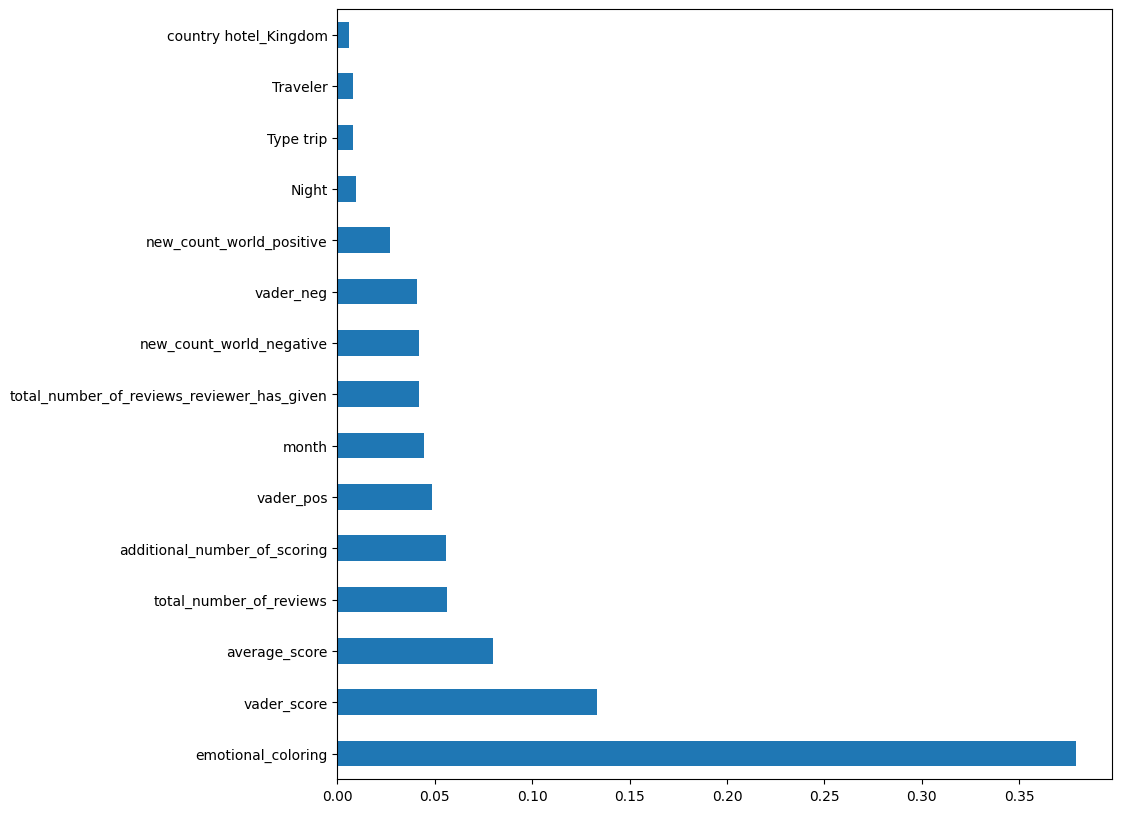

In [338]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Мы получили результат 0.8780. Используем другой датасет - data, где мы не отбирали признаки 

In [339]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)


# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


MAPE: 0.8782347881784015


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


Мы получили результат 0.8782. Используем другой датасет - data_sign_norm_stn. Но сначала нам нужно вернуть на таргет в прежний вид.

In [340]:
data_sign_norm_stn['reviewer_score']

0        -0.822917
1        -0.822917
2        -0.822917
3        -0.822917
4        -0.822917
            ...   
515426    0.093750
515427    0.135417
515428    0.041667
515429    0.135417
515430    0.093750
Name: reviewer_score, Length: 515431, dtype: float64

In [344]:
data_sign_norm_stn['reviewer_score'] = data['reviewer_score']
data_sign_norm_stn['sample'] = data['sample']

In [345]:
# Теперь выделим тестовую часть
train_data = data_sign_norm_stn.query('sample == 1').drop(['sample'], axis=1)
test_data = data_sign_norm_stn.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)


# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


MAPE: 0.8781057399237242


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


Результа чуть лучше, чем первый наш датасет

In [ ]:
test_data.sample(10)

,additional_number_of_scoring,average_score,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,reviewer_score,country hotel_Spain,country hotel_Kingdom,country hotel_Austria,month,top,good,only negative,only positive,new_count_world_negative,new_count_world_positive,emotional_coloring,Type trip,Traveler,Night
13518,61,8.2,732,1,0.0,1,0,0,3,0,0,0,1,2,8,4.00,1,0,0
11231,364,7.1,1877,4,0.0,0,1,0,4,0,1,0,0,71,4,0.06,1,0,1
67999,1274,7.7,6539,5,0.0,0,1,0,5,0,1,0,0,1,3,3.00,1,0,0
37057,1258,9.4,4204,4,0.0,0,1,0,11,1,0,0,0,23,21,0.91,1,0,1
44333,317,7.6,1458,2,0.0,0,1,0,1,0,1,0,1,2,8,4.00,0,1,0
2036,129,7.8,617,1,0.0,0,1,0,7,0,1,0,1,2,38,19.00,1,0,1
66704,297,8.3,2027,4,0.0,0,0,0,4,0,0,0,1,2,11,5.50,1,0,0
95212,272,8.4,3224,1,0.0,0,0,1,7,0,0,0,1,2,35,17.50,1,0,0
116605,233,8.7,917,3,0.0,0,1,0,2,0,0,0,0,13,8,0.62,1,0,1
125217,31,8.7,221,1,0.0,0,1,0,5,0,0,0,0,8,4,0.50,1,0,1


In [ ]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128935 entries, 0 to 128934
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                128935 non-null  int64  
 1   average_score                               128935 non-null  float64
 2   total_number_of_reviews                     128935 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  128935 non-null  int64  
 4   country hotel_Spain                         128935 non-null  int64  
 5   country hotel_Kingdom                       128935 non-null  int64  
 6   country hotel_Austria                       128935 non-null  int64  
 7   month                                       128935 non-null  int64  
 8   top                                         128935 non-null  int64  
 9   good                                        128935 non-null  int64  
 

In [ ]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [ ]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished


In [ ]:
predict_submission

array([8.318, 6.826, 7.961, ..., 8.158, 9.473, 7.801])

In [ ]:
list(sample_submission)

['reviewer_score', 'id']

In [ ]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.318,488440
1,6.826,274649
2,7.961,374688
3,9.635,404352
4,9.001,451596
5,8.621,302161
6,7.946,317079
7,7.517,13963
8,8.526,159785
9,8.068,195089
